# Triple Halide Perovskite: Phase Map

*ZDR 2021-11-21*

A simple demo of modeling phase data


In [1]:
## Load packages
import grama as gr
import numpy as np
import plotnine as pt

## Load scikit tools
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

## Package setup
DF = gr.Intention()

## Helper Functions


In [2]:
## Barycentric converter
def tran_bary(df):
    r"""Convert to barycentric coordinates
    """
    df_tmp = df.copy()
    df_tmp["x"] = 0.0 * df.I + 1.0 * df.Br + 0.5 * df.Cl
    df_tmp["y"] = 0.0 * df.I + 0.0 * df.Br + np.sqrt(1 - 0.5**2) * df.Cl
    
    return df_tmp

# Pipe-enabled function
tf_bary = gr.add_pipe(tran_bary)
# Triangle boundary
df_tri_bounds = (
    gr.df_make(
        Br=[1, 0, 0, 1],
        Cl=[0, 1, 0, 0],
        I =[0, 0, 1, 0],
    )
    >> tf_bary()
)
# Labels
df_tri_labels = (
    gr.df_make(
        x=[-0.1, +1.1, +0.5],
        y=[+0.0, +0.0, +np.sqrt(1 - 0.5**2) + 0.1],
        label=["I", "Br", "Cl"]
    )
)


## Generate Fake data


In [3]:
## Fake Triple Halide Perovskite data: The GP does not know hoe to handle 50 duplicated false center points
df_thp_1 = (
    ## I -- Br tie
    gr.df_make(
        Br=np.linspace(0, 1, num=25),
        Cl=0,
        single_phase=True,
    )
    >> gr.tf_mutate(I=1 - DF.Br)
    ## Cl -- Br tie
    >> gr.tf_bind_rows(
        gr.df_make(
            Br=np.linspace(0, 1, num=25),
            I=0,
            single_phase=True,
        )
        >> gr.tf_mutate(Cl=1 - DF.Br)
    )
    ## Middle of Cl -- I
    # Replicate single point to weight against densely-sampled edges
    >> gr.tf_bind_rows(
        gr.df_make(Cl=0.33, I=0.33, Br=[0.34] * 50, single_phase=False)
    )
    >> tf_bary()
)


In [4]:
## Fake Triple Halide Perovskite data: This creates a reasonable looking model
df_thp_2 = (
    ## I -- Br tie
    gr.df_make(
        Br=np.linspace(0, 1, num=25),
        Cl=0,
        single_phase=True,
    )
    >> gr.tf_mutate(I=1 - DF.Br)
    ## Cl -- Br tie
    >> gr.tf_bind_rows(
        gr.df_make(
            Br=np.linspace(0, 1, num=25),
            I=0,
            single_phase=True,
        )
        >> gr.tf_mutate(Cl=1 - DF.Br)
    )
    ## Middle of Cl -- I
    # Replicate single point to weight against densely-sampled edges
    
    >> gr.tf_bind_rows(
        gr.df_make(Cl=0.5, I=0.5, Br=[0] * 50, single_phase=False)
    )

    >> tf_bary()
)


In [5]:
## Fake Triple Halide Perovskite data: With only two false points, the model still predicts TRUE for everything
df_thp_3 = (
    ## I -- Br tie
    gr.df_make(
        Br=np.linspace(0, 1, num=25),
        Cl=0,
        single_phase=True,
    )
    >> gr.tf_mutate(I=1 - DF.Br)
    ## Cl -- Br tie
    >> gr.tf_bind_rows(
        gr.df_make(
            Br=np.linspace(0, 1, num=25),
            I=0,
            single_phase=True,
        )
        >> gr.tf_mutate(Cl=1 - DF.Br)
    )
    ## Middle of Cl -- I
    # Replicate single point to weight against densely-sampled edges
    
    >> gr.tf_bind_rows(
        gr.df_make(Cl=0.33, I=0.33, Br=[0.34] * 1, single_phase=False)
    )
    >> gr.tf_bind_rows(
        gr.df_make(Cl=0.5, I=0.5, Br=[0] * 2, single_phase=False)
    )

    >> tf_bary()
)


In [6]:
## Fake Triple Halide Perovskite data: With only two false points, the model still predicts TRUE for everything
df_thp_3s = (
    ## I -- Br tie
    gr.df_make(
        Br=np.linspace(0, 1, num=25),
        Cl=0,
        single_phase=True,
    )
    >> gr.tf_mutate(I=1 - DF.Br)
    ## Cl -- Br tie
    >> gr.tf_bind_rows(
        gr.df_make(
            Br=np.linspace(0, 1, num=25),
            I=0,
            single_phase=True,
        )
        >> gr.tf_mutate(Cl=1 - DF.Br)
    )
    ## Middle of Cl -- I
    # Replicate single point to weight against densely-sampled edges
    
    >> gr.tf_bind_rows(
        gr.df_make(Cl=0.33, I=0.33, Br=[0.34] * 1, single_phase=True)
    )
    >> gr.tf_bind_rows(
        gr.df_make(Cl=0.5, I=0.5, Br=[0] * 2, single_phase=False)
    )

    >> tf_bary()
)


In [7]:
## Fake Triple Halide Perovskite data: This yields the same result as having only 50 false points, all in the middle.  Adding another clump of false points does not help clarify
df_thp_4 = (
    ## I -- Br tie
    gr.df_make(
        Br=np.linspace(0, 1, num=25),
        Cl=0,
        single_phase=True,
    )
    >> gr.tf_mutate(I=1 - DF.Br)
    ## Cl -- Br tie
    >> gr.tf_bind_rows(
        gr.df_make(
            Br=np.linspace(0, 1, num=25),
            I=0,
            single_phase=True,
        )
        >> gr.tf_mutate(Cl=1 - DF.Br)
    )
    ## Middle of Cl -- I
    # Replicate single point to weight against densely-sampled edges
    
    >> gr.tf_bind_rows(
        gr.df_make(Cl=0.33, I=0.33, Br=[0.34] * 50, single_phase=False)
    )
    >> gr.tf_bind_rows(
        gr.df_make(Cl=0.5, I=0.5, Br=[0] * 50, single_phase=False)
    )

    >> tf_bary()
)


In [8]:
## Fake Triple Halide Perovskite data: This creates an interesting arrowhead shape where the Br corner is NOT the most certainly TRUE space.
df_thp_5 = (
    ## I -- Br tie
    gr.df_make(
        Br=np.linspace(0, 1, num=25),
        Cl=0,
        single_phase=True,
    )
    >> gr.tf_mutate(I=1 - DF.Br)
    ## Cl -- Br tie
    >> gr.tf_bind_rows(
        gr.df_make(
            Br=np.linspace(0, 1, num=25),
            I=0,
            single_phase=True,
        )
        >> gr.tf_mutate(Cl=1 - DF.Br)
    )
    ## Cl -- I tie
    >> gr.tf_bind_rows(
        gr.df_make(
            I=np.linspace(0, 1, num=25),
            Br=0,
            single_phase=False,
        )
        >> gr.tf_mutate(Cl=1 - DF.I)
    )
    # Center point
    >> gr.tf_bind_rows(
        gr.df_make(Cl=0.33, I=0.33, Br=[0.34] * 1, single_phase=False)
    )
    
    >> tf_bary()
)

In [9]:
## Fake Triple Halide Perovskite data: This creates a space where the ClI line is FALSE, and the rest of the triange is more likely to be TRUE, but interestingly the most TRUE sections are on the other triange edges near the FALSE boundary
df_thp_6 = (
    ## I -- Br tie
    gr.df_make(
        Br=np.linspace(0, 1, num=25),
        Cl=0,
        single_phase=True,
    )
    >> gr.tf_mutate(I=1 - DF.Br)
    ## Cl -- Br tie
    >> gr.tf_bind_rows(
        gr.df_make(
            Br=np.linspace(0, 1, num=25),
            I=0,
            single_phase=True,
        )
        >> gr.tf_mutate(Cl=1 - DF.Br)
    )
    ## Cl -- I tie
    >> gr.tf_bind_rows(
        gr.df_make(
            I=np.linspace(0, 1, num=25),
            Br=0,
            single_phase=False,
        )
        >> gr.tf_mutate(Cl=1 - DF.I)
    )
    
    >> tf_bary()
)

In [10]:
## Fake Triple Halide Perovskite data: This one looks plausible as well
df_thp_7 = (
    ## I -- Br tie
    gr.df_make(
        Br=np.linspace(0, 1, num=25),
        Cl=0,
        single_phase=True,
    )
    >> gr.tf_mutate(I=1 - DF.Br)
    ## Cl -- Br tie
    >> gr.tf_bind_rows(
        gr.df_make(
            Br=np.linspace(0, 1, num=25),
            I=0,
            single_phase=True,
        )
        >> gr.tf_mutate(Cl=1 - DF.Br)
    )
    ## Cl -- I tie
    >> gr.tf_bind_rows(
        gr.df_make(
            I=np.linspace(0, 1, num=5),
            Br=0,
            single_phase=False,
        )
        >> gr.tf_mutate(Cl=1 - DF.I)
    )
    ## Middle of the chart
    >> gr.tf_bind_rows(
        gr.df_make(Cl=0.33, I=0.33, Br=[0.34] * 1, single_phase=False)
    )
    >> tf_bary()
)


In [11]:
## Fake Triple Halide Perovskite data: One false point
df_thp_8 = (
    ## I -- Br tie
    gr.df_make(
        Br=np.linspace(0, 1, num=25),
        Cl=0,
        single_phase=True,
    )
    >> gr.tf_mutate(I=1 - DF.Br)
    ## Cl -- Br tie
    >> gr.tf_bind_rows(
        gr.df_make(
            Br=np.linspace(0, 1, num=25),
            I=0,
            single_phase=True,
        )
        >> gr.tf_mutate(Cl=1 - DF.Br)
    )
    ## Cl -- I tie
    >> gr.tf_bind_rows(
        gr.df_make(Cl=0.5, I=0.5, Br=[0] * 1, single_phase=False)
    )

    >> tf_bary()
)

In [12]:
## Fake Triple Halide Perovskite data: Two false points
df_thp_9 = (
    ## I -- Br tie
    gr.df_make(
        Br=np.linspace(0, 1, num=25),
        Cl=0,
        single_phase=True,
    )
    >> gr.tf_mutate(I=1 - DF.Br)
    ## Cl -- Br tie
    >> gr.tf_bind_rows(
        gr.df_make(
            Br=np.linspace(0, 1, num=25),
            I=0,
            single_phase=True,
        )
        >> gr.tf_mutate(Cl=1 - DF.Br)
    )
    ## Cl -- I tie
    >> gr.tf_bind_rows(
        gr.df_make(Cl=0.5, I=0.5, Br=[0] * 2, single_phase=False)
    )
    >> tf_bary()
)


In [13]:
## Fake Triple Halide Perovskite data: data mimic
df_thp_powder = (    
    ## I -- Br tie
    #Stable with 0-8% I, the rest Br
    gr.df_make( 
        I=np.linspace(0, 0.08, num=4),
        Cl=0,
        single_phase=True,
    )
    >> gr.tf_mutate(Br=1 - DF.I)
    #Stable with 74-100% I, the rest Br
    >> gr.tf_bind_rows(
        gr.df_make( 
            I=np.linspace(0.74, 1, num=12),
            Cl=0,
            single_phase=True,
        )
        >> gr.tf_mutate(Br=1 - DF.I)
    )
    #Unstable elsewhere
    >> gr.tf_bind_rows(
        gr.df_make( 
            I=np.linspace(0.08, 0.74, num=10),
            Cl=0,
            single_phase=False,
        )
        >> gr.tf_mutate(Br=1 - DF.I)
    )
    ## Cl -- I tie
    #Stable with 0-5% I, the rest Cl
    >> gr.tf_bind_rows( 
        gr.df_make( 
            I=np.linspace(0, 0.05, num=2),
            Br=0,
            single_phase=True,
        )
        >> gr.tf_mutate(Cl=1 - DF.I)
    )
    #Stable with 95-100% I, the rest Cl
    >> gr.tf_bind_rows(
        gr.df_make( 
            I=np.linspace(0.95,1,num=2),
            Br=0,
            single_phase=True,
        )
        >> gr.tf_mutate(Cl=1 - DF.I)
     )
     #Unstable elsewhere
    >> gr.tf_bind_rows(
         gr.df_make(
            I=np.linspace(0.05, 0.95, num=10),
            Br=0,
            single_phase=False,
        )
        >> gr.tf_mutate(Cl=1 - DF.I)
    )    
    ##Cl -- Br tie
    # Replicate single point to weight against densely-sampled edges
    >> gr.tf_bind_rows(
        gr.df_make(Cl=0.5, I=0, Br=[0.5] * 1, single_phase=False)
    )
    >> tf_bary()
)

In [14]:
## Fake Triple Halide Perovskite data: 3 corner points,  3 center edge points, one center point
df_thp_mystery1 = (
    #True edge points
    gr.df_make(Cl=1, I=0, Br=[0] * 1, single_phase=True)
    >> gr.tf_bind_rows(
        gr.df_make(Cl=0, I=1, Br=[0] * 1, single_phase=True)
    )
    >> gr.tf_bind_rows(
        gr.df_make(Cl=0, I=0, Br=[1] * 1, single_phase=True)
    )
    #Center edge points
     >> gr.tf_bind_rows(
        gr.df_make(Cl=0.5, I=0.5, Br=[0] * 1, single_phase=True)
    )
    >> gr.tf_bind_rows(
        gr.df_make(Cl=0, I=0.5, Br=[0.5] * 1, single_phase=True)
    )
    >> gr.tf_bind_rows(
        gr.df_make(Cl=0.5, I=0, Br=[0.5] * 1, single_phase=True)
    )
    #Center point
    >> gr.tf_bind_rows(
        gr.df_make(Cl=0.33, I=0.33, Br=[0.34] * 1, single_phase=False)
    )
    >> tf_bary()
)

Visualize the synthetic data


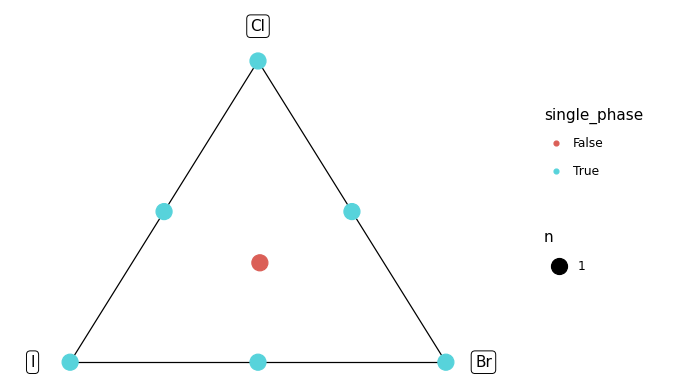

<ggplot: (157576951028)>

In [15]:
(
    df_thp_mystery1
    
    >> pt.ggplot(pt.aes("x", "y"))
    + pt.geom_segment(
        data=df_tri_bounds,
        mapping=pt.aes(xend="gr.lead(x)", yend="gr.lead(y)")
    )
    + pt.geom_label(
        data=df_tri_labels,
        mapping=pt.aes(label="label")
    )
    + pt.geom_count(pt.aes(color="single_phase"))
    + pt.theme_void()
    + pt.theme(
        plot_background=pt.element_rect(fill="white")
    )
)

## Modeling: Comparing Two Plots

### GP Model

Fit a [gaussian process classifier](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html); this is a much more flexible class of model that will allow for more spatial variation in the predictions.


In [16]:
#Change which two data frames are being compared HERE

df_thp_initial = df_thp_mystery1;
df_thp_final = df_thp_powder;

In [17]:
## Set up training data
var = ["Cl", "Br", "I"]
out = ["single_phase"]
df_train = (
    df_thp_initial
#     df_thp_5
)
X = df_train[var]
Y = np.atleast_2d(df_train[out].values)

## Fit a GP
kernel = 1.0 * RBF(1.0)
model_gpc = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(X, Y)

# Package the model
md_gpc = (
    gr.Model()
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            pr_single_phase=model_gpc.predict_proba(df[var])[:, 1]
        ),
        var=var,
        out=["pr_single_phase"]
    )
)
#md_gpc


Visualize the probability values


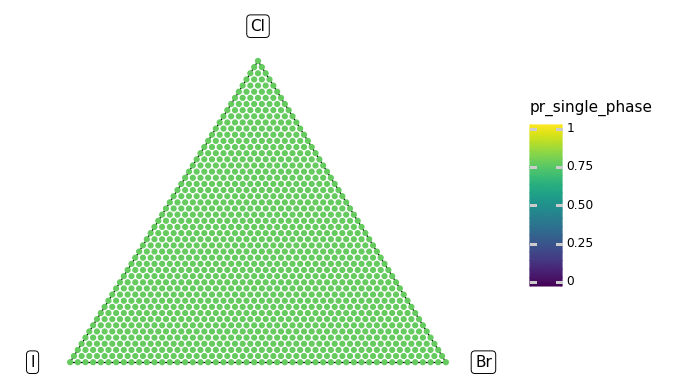

<ggplot: (157579138795)>

In [18]:
(
    gr.df_make(Br=np.linspace(0, 1, num=50))
    >> gr.tf_outer(
        df_outer=gr.df_make(Cl=np.linspace(0, 1, num=50))
    )
    >> gr.tf_filter(DF.Br + DF.Cl <= 1)
    >> gr.tf_mutate(I=1 - DF.Br - DF.Cl)
    >> tf_bary()
    >> gr.tf_md(md_gpc)
    >> gr.tf_mutate(pr_log=gr.log(DF.pr_single_phase))
    
    >> pt.ggplot(pt.aes("x", "y"))
    + pt.geom_segment(
        data=df_tri_bounds,
        mapping=pt.aes(xend="gr.lead(x)", yend="gr.lead(y)")
    )
    + pt.geom_label(
        data=df_tri_labels,
        mapping=pt.aes(label="label")
    )
    + pt.geom_point(pt.aes(color="pr_single_phase"))
    
    + pt.scale_color_continuous(limits=(0, 1))
    + pt.theme_void()
    + pt.theme(
        plot_background=pt.element_rect(fill="white")
    )
)


*Observations*

- This is a much more plausible model, as it exhibits spatial variation in Pr[single phase].


### GP Model #2

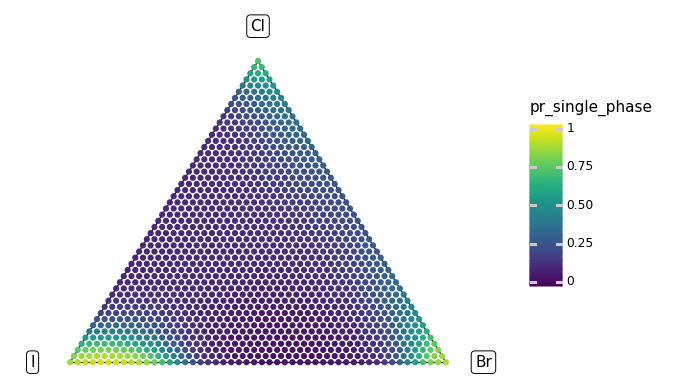

<ggplot: (157579205617)>

In [19]:
## Set up training data
var = ["Cl", "Br", "I"]
out = ["single_phase"]
df_train = (
    df_thp_final
#     df_thp_5
)
X = df_train[var]
Y = np.atleast_2d(df_train[out].values)

## Fit a GP
kernel = 1.0 * RBF(1.0)
model_gpc = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(X, Y)

# Package the model
md_gpc = (
    gr.Model()
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            pr_single_phase=model_gpc.predict_proba(df[var])[:, 1]
        ),
        var=var,
        out=["pr_single_phase"]
    )
)

(
    gr.df_make(Br=np.linspace(0, 1, num=50))
    >> gr.tf_outer(
        df_outer=gr.df_make(Cl=np.linspace(0, 1, num=50))
    )
    >> gr.tf_filter(DF.Br + DF.Cl <= 1)
    >> gr.tf_mutate(I=1 - DF.Br - DF.Cl)
    >> tf_bary()
    >> gr.tf_md(md_gpc)
    >> gr.tf_mutate(pr_log=gr.log(DF.pr_single_phase))
    
    >> pt.ggplot(pt.aes("x", "y"))
    + pt.geom_segment(
        data=df_tri_bounds,
        mapping=pt.aes(xend="gr.lead(x)", yend="gr.lead(y)")
    )
    + pt.geom_label(
        data=df_tri_labels,
        mapping=pt.aes(label="label")
    )
    + pt.geom_point(pt.aes(color="pr_single_phase"))
    
    + pt.scale_color_continuous(limits=(0, 1))
    + pt.theme_void()
    + pt.theme(
        plot_background=pt.element_rect(fill="white")
    )
)


## Compare different center outcome


In [20]:
## Set up training data
df_train = (
    df_thp_final
)
Xs = df_train[var]
Ys = np.atleast_2d(df_train[out].values)

## Fit a GP
kernel = 1.0 * RBF(1.0)
model_gpc_s = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(Xs, Ys)

# Package the model
md_gpc_s = (
    gr.Model()
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            pr_single_phase_s=model_gpc_s.predict_proba(df[var])[:, 1]
        ),
        var=var,
        out=["pr_single_phase_s"]
    )
)
md_gpc_s


model: None

  inputs:
    var_det:
      Br: (unbounded)
      Cl: (unbounded)
      I: (unbounded)

    var_rand:

    copula:
      None

  functions:
      f0: ['Cl', 'Br', 'I'] -> ['pr_single_phase_s']

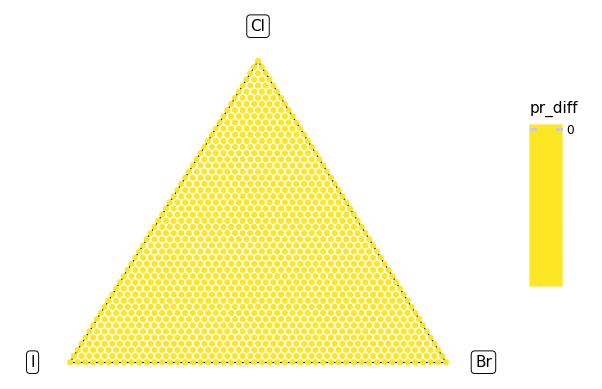

<ggplot: (157581619420)>

In [21]:
(
    gr.df_make(Br=np.linspace(0, 1, num=50))
    >> gr.tf_outer(
        df_outer=gr.df_make(Cl=np.linspace(0, 1, num=50))
    )
    >> gr.tf_filter(DF.Br + DF.Cl <= 1)
    >> gr.tf_mutate(I=1 - DF.Br - DF.Cl)
    >> tf_bary()
    >> gr.tf_md(md_gpc)   # Center point is False
    >> gr.tf_md(md_gpc_s) # Center point is True
    >> gr.tf_mutate(pr_diff=DF.pr_single_phase - DF.pr_single_phase_s)
    
    >> pt.ggplot(pt.aes("x", "y"))
    + pt.geom_segment(
        data=df_tri_bounds,
        mapping=pt.aes(xend="gr.lead(x)", yend="gr.lead(y)")
    )
    + pt.geom_label(
        data=df_tri_labels,
        mapping=pt.aes(label="label")
    )
    + pt.geom_point(pt.aes(color="pr_diff"))
    
#     + pt.scale_color_continuous(limits=(0, 1))
    + pt.theme_void()
    + pt.theme(
        plot_background=pt.element_rect(fill="white")
    )
)
